Importing required packages

In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

Filtering out some test participants (used to test the survey system), added dataset column and deleted "instruction" and "configHash Column"

In [2]:
# Load the CSV file
file_path = './data/final-study-raw.csv'
df = pd.read_csv(file_path)

df.head(10)



,participantId,trialId,trialOrder,responseId,status,percentComplete,description,instruction,responsePrompt,answer,correctAnswer,responseMin,responseMax,startTime,endTime,duration,configHash
0,0af16079-0483-461b-93c6-eca94561e312,Consent,1,id,rejected,29.41,undefined,undefined,Please enter your Prolific ID,cvv,undefined,undefined,undefined,2024-08-13T15:46:20.211Z,2024-08-13T15:46:27.152Z,6941,b011fd085c893b46f29f1bc1c954aff0cac6737dd8ff96...
1,0af16079-0483-461b-93c6-eca94561e312,Consent,1,consent,rejected,29.41,undefined,undefined,Do you consent to the study and wish to continue?,yes,undefined,undefined,undefined,2024-08-13T15:46:20.211Z,2024-08-13T15:46:27.152Z,6941,b011fd085c893b46f29f1bc1c954aff0cac6737dd8ff96...
2,0af16079-0483-461b-93c6-eca94561e312,Training 1,3,1,rejected,29.41,undefined,Please answer the following questions:,What is the largest set?,Action,Action,undefined,undefined,2024-08-13T16:47:36.097Z,2024-08-13T16:48:02.663Z,26566,b011fd085c893b46f29f1bc1c954aff0cac6737dd8ff96...
3,0af16079-0483-461b-93c6-eca94561e312,Training 1,3,2,rejected,29.41,undefined,Please answer the following questions:,What is the largest intersection?,Empty Intersection (no sets),Empty Intersection (no sets),undefined,undefined,2024-08-13T16:47:36.097Z,2024-08-13T16:48:02.663Z,26566,b011fd085c893b46f29f1bc1c954aff0cac6737dd8ff96...
4,0af16079-0483-461b-93c6-eca94561e312,Training 1,3,3,rejected,29.41,undefined,Please answer the following questions:,How many sets make up the largest intersection?,It is the empty intersection (no sets),It is the empty intersection (no sets),undefined,undefined,2024-08-13T16:47:36.097Z,2024-08-13T16:48:02.663Z,26566,b011fd085c893b46f29f1bc1c954aff0cac6737dd8ff96...
5,0af16079-0483-461b-93c6-eca94561e312,Training 2,4,1,rejected,29.41,undefined,Please answer the following questions:,What is the largest set?,Adventure,Adventure,undefined,undefined,2024-08-13T16:48:02.680Z,2024-08-13T16:48:16.430Z,13750,b011fd085c893b46f29f1bc1c954aff0cac6737dd8ff96...
6,0af16079-0483-461b-93c6-eca94561e312,Training 2,4,2,rejected,29.41,undefined,Please answer the following questions:,What is the largest intersection?,Adventure,Adventure,undefined,undefined,2024-08-13T16:48:02.680Z,2024-08-13T16:48:16.430Z,13750,b011fd085c893b46f29f1bc1c954aff0cac6737dd8ff96...
7,0af16079-0483-461b-93c6-eca94561e312,Training 2,4,3,rejected,29.41,undefined,Please answer the following questions:,How many sets make up the largest intersection?,It is only of a single set,It is only of a single set,undefined,undefined,2024-08-13T16:48:02.680Z,2024-08-13T16:48:16.430Z,13750,b011fd085c893b46f29f1bc1c954aff0cac6737dd8ff96...
8,2033c860-b467-42e3-ab2e-19ca44e65b0a,Consent,1,id,rejected,100.00,undefined,undefined,Your Prolific ID,Rahat Zaman,undefined,undefined,undefined,2024-07-31T03:26:03.202Z,2024-07-31T03:27:28.983Z,85781,ecdced17dc1fd86b8b83f4914646d257990133f9423074...
9,2033c860-b467-42e3-ab2e-19ca44e65b0a,Consent,1,consent,rejected,100.00,undefined,undefined,Do you consent to the study and wish to continue?,yes,undefined,undefined,undefined,2024-07-31T03:26:03.202Z,2024-07-31T03:27:28.983Z,85781,ecdced17dc1fd86b8b83f4914646d257990133f9423074...


Adding the correct answers (was not added in first two pilots)

In [5]:


# Load the CSV file
file_path = './data/prepilot-pilot-raw.csv'
df = pd.read_csv(file_path)

# Define the correct answers for each specific trialId and responseId
correct_answers_map = {
    'Covid-Vis-Q1': {
        'voq1': '6',
        'voq2': 'Fatigue',
        'voq3': 'Anosmia,Fatigue',
        'voq4': '281',
        'voq5': 'It is the intersection of 2-3 sets',
        'voq6': 'Diverging a lot',
        'voq7': 'Yes',
        'voq8': 'Yes'
    },
    'Covid-Text-Q1': {
        'voq1': '6',
        'voq2': 'Fatigue',
        'voq3': 'Anosmia,Fatigue',
        'voq4': '281',
        'voq5': 'It is the intersection of 2-3 sets',
        'voq6': 'Diverging a lot',
        'voq7': 'Yes',
        'voq8': 'Yes'
    },
    'Covid-Both-Q1': {
        'voq1': '6',
        'voq2': 'Fatigue',
        'voq3': 'Anosmia,Fatigue',
        'voq4': '281',
        'voq5': 'It is the intersection of 2-3 sets',
        'voq6': 'Diverging a lot',
        'voq7': 'Yes',
        'voq8': 'Yes'
    },
    'Tennis-Vis-Q1': {
        'voq1': '4',
        'voq2': 'Australian',
        'voq3': 'French Open',
        'voq4': '23',
        'voq5': 'It is only of a single set',
        'voq6': 'Roughly equal',
        'voq7': 'No',
        'voq8': 'Yes'
    },
    'Tennis-Text-Q1': {
        'voq1': '4',
        'voq2': 'Australian',
        'voq3': 'French Open',
        'voq4': '23',
        'voq5': 'It is only of a single set',
        'voq6': 'Roughly equal',
        'voq7': 'No',
        'voq8': 'Yes'
    },
    'Tennis-Both-Q1': {
        'voq1': '4',
        'voq2': 'Australian',
        'voq3': 'French Open',
        'voq4': '23',
        'voq5': 'It is only of a single set',
        'voq6': 'Roughly equal',
        'voq7': 'No',
        'voq8': 'Yes'
    },
    'Organizations-Vis-Q1': {
        'voq1': '8',
        'voq2': 'UPU',
        'voq3': 'Interpol,UN,UNESCO,UPU,WHO',
        'voq4': '117',
        'voq5': 'It is the intersection of many sets',
        'voq6': 'Diverging a lot',
        'voq7': 'Yes',
        'voq8': 'No'
    },
    'Organizations-Text-Q1': {
        'voq1': '8',
        'voq2': 'UPU',
        'voq3': 'Interpol,UN,UNESCO,UPU,WHO',
        'voq4': '117',
        'voq5': 'It is the intersection of many sets',
        'voq6': 'Diverging a lot',
        'voq7': 'Yes',
        'voq8': 'No'
    },
    'Organizations-Both-Q1': {
        'voq1': '8',
        'voq2': 'UPU',
        'voq3': 'Interpol,UN,UNESCO,UPU,WHO',
        'voq4': '117',
        'voq5': 'It is the intersection of many sets',
        'voq6': 'Diverging a lot',
        'voq7': 'Yes',
        'voq8': 'No'
    }
}

# Update the correctAnswer column based on the trialId and responseId
for trial_id, responses in correct_answers_map.items():
    for response_id, correct_answer in responses.items():
        condition = (df['trialId'] == trial_id) & (df['responseId'] == response_id)
        df.loc[condition, 'correctAnswer'] = correct_answer

# Display the updated dataframe
df.head(10)  # Displaying the first 20 rows for verification


,participantId,trialId,trialOrder,responseId,status,percentComplete,description,instruction,responsePrompt,answer,correctAnswer,responseMin,responseMax,startTime,endTime,duration,configHash
0,2033c860-b467-42e3-ab2e-19ca44e65b0a,Consent,1,id,completed,100.0,undefined,undefined,Your Prolific ID,Rahat Zaman,undefined,undefined,undefined,2024-07-31T03:26:03.202Z,2024-07-31T03:27:28.983Z,85781,ecdced17dc1fd86b8b83f4914646d257990133f9423074...
1,2033c860-b467-42e3-ab2e-19ca44e65b0a,Consent,1,consent,completed,100.0,undefined,undefined,Do you consent to the study and wish to continue?,yes,undefined,undefined,undefined,2024-07-31T03:26:03.202Z,2024-07-31T03:27:28.983Z,85781,ecdced17dc1fd86b8b83f4914646d257990133f9423074...
2,2033c860-b467-42e3-ab2e-19ca44e65b0a,Training 1,3,1,completed,100.0,undefined,Please answer the following questions:,What is the largest set?,Romance,Action,undefined,undefined,2024-07-31T03:48:25.846Z,2024-07-31T03:52:51.094Z,265248,ecdced17dc1fd86b8b83f4914646d257990133f9423074...
3,2033c860-b467-42e3-ab2e-19ca44e65b0a,Training 1,3,2,completed,100.0,undefined,Please answer the following questions:,What is the largest intersection?,Empty Intersection (no sets),Empty Intersection (no sets),undefined,undefined,2024-07-31T03:48:25.846Z,2024-07-31T03:52:51.094Z,265248,ecdced17dc1fd86b8b83f4914646d257990133f9423074...
4,2033c860-b467-42e3-ab2e-19ca44e65b0a,Training 1,3,3,completed,100.0,undefined,Please answer the following questions:,How many sets make up the largest intersection?,It is the empty intersection (no sets),It is the empty intersection (no sets),undefined,undefined,2024-07-31T03:48:25.846Z,2024-07-31T03:52:51.094Z,265248,ecdced17dc1fd86b8b83f4914646d257990133f9423074...
5,2033c860-b467-42e3-ab2e-19ca44e65b0a,Training 2,4,1,completed,100.0,undefined,Please answer the following questions:,What is the largest set?,Adventure,Adventure,undefined,undefined,2024-07-31T03:52:51.112Z,2024-07-31T04:01:08.980Z,497868,ecdced17dc1fd86b8b83f4914646d257990133f9423074...
6,2033c860-b467-42e3-ab2e-19ca44e65b0a,Training 2,4,2,completed,100.0,undefined,Please answer the following questions:,What is the largest intersection?,Empty Intersection (no sets),Adventure,undefined,undefined,2024-07-31T03:52:51.112Z,2024-07-31T04:01:08.980Z,497868,ecdced17dc1fd86b8b83f4914646d257990133f9423074...
7,2033c860-b467-42e3-ab2e-19ca44e65b0a,Training 2,4,3,completed,100.0,undefined,Please answer the following questions:,How many sets make up the largest intersection?,It is the empty intersection (no sets),It is only of a single set,undefined,undefined,2024-07-31T03:52:51.112Z,2024-07-31T04:01:08.980Z,497868,ecdced17dc1fd86b8b83f4914646d257990133f9423074...
8,2033c860-b467-42e3-ab2e-19ca44e65b0a,Training 3,5,1,completed,100.0,undefined,Please answer the following questions:,What is the largest set?,Drama,Drama,undefined,undefined,2024-07-31T04:01:08.993Z,2024-07-31T04:01:40.418Z,31425,ecdced17dc1fd86b8b83f4914646d257990133f9423074...
9,2033c860-b467-42e3-ab2e-19ca44e65b0a,Training 3,5,2,completed,100.0,undefined,Please answer the following questions:,What is the largest intersection?,Drama,Drama,undefined,undefined,2024-07-31T04:01:08.993Z,2024-07-31T04:01:40.418Z,31425,ecdced17dc1fd86b8b83f4914646d257990133f9423074...


Add a field named isCorrectlyAnswered

In [3]:
# List of factual trialIds
factual_trial_ids = [
    'Covid-Vis-Q1', 'Covid-Text-Q1', 'Covid-Both-Q1',
    'Tennis-Vis-Q1', 'Tennis-Text-Q1', 'Tennis-Both-Q1',
    'Organizations-Vis-Q1', 'Organizations-Text-Q1', 'Organizations-Both-Q1'
]

# List of factual responseIds (for simplicity, assuming they are the same across all these trialIds)
factual_response_ids = ['voq1', 'voq2', 'voq3', 'voq4', 'voq5', 'voq6', 'voq7', 'voq8']

training_trial_ids = ['Training 1', 'Training 2', 'Training 3']
training_response_ids = ['1', '2', '3']



# Function to determine if the answer is correct or should be marked as "undefined"
def is_correctly_answered(row):
    if (row['trialId'] in factual_trial_ids and row['responseId'] in factual_response_ids) or \
       (row['trialId'] in training_trial_ids and row['responseId'] in training_response_ids):
        return row['answer'] == row['correctAnswer']
    else:
        return "undefined"

# Add the isCorrectlyAnswered column
df['isCorrectlyAnswered'] = df.apply(is_correctly_answered, axis=1)

# Reorder columns to place isCorrectlyAnswered right after correctAnswer
cols = df.columns.tolist()
correct_answer_index = cols.index('correctAnswer')
cols.insert(correct_answer_index + 1, cols.pop(cols.index('isCorrectlyAnswered')))
df = df[cols]

df.head(10)  # Displaying the first 50 rows for verification

,participantId,trialId,trialOrder,responseId,status,percentComplete,description,instruction,responsePrompt,answer,correctAnswer,isCorrectlyAnswered,responseMin,responseMax,startTime,endTime,duration,configHash
0,0af16079-0483-461b-93c6-eca94561e312,Consent,1,id,rejected,29.41,undefined,undefined,Please enter your Prolific ID,cvv,undefined,undefined,undefined,undefined,2024-08-13T15:46:20.211Z,2024-08-13T15:46:27.152Z,6941,b011fd085c893b46f29f1bc1c954aff0cac6737dd8ff96...
1,0af16079-0483-461b-93c6-eca94561e312,Consent,1,consent,rejected,29.41,undefined,undefined,Do you consent to the study and wish to continue?,yes,undefined,undefined,undefined,undefined,2024-08-13T15:46:20.211Z,2024-08-13T15:46:27.152Z,6941,b011fd085c893b46f29f1bc1c954aff0cac6737dd8ff96...
2,0af16079-0483-461b-93c6-eca94561e312,Training 1,3,1,rejected,29.41,undefined,Please answer the following questions:,What is the largest set?,Action,Action,True,undefined,undefined,2024-08-13T16:47:36.097Z,2024-08-13T16:48:02.663Z,26566,b011fd085c893b46f29f1bc1c954aff0cac6737dd8ff96...
3,0af16079-0483-461b-93c6-eca94561e312,Training 1,3,2,rejected,29.41,undefined,Please answer the following questions:,What is the largest intersection?,Empty Intersection (no sets),Empty Intersection (no sets),True,undefined,undefined,2024-08-13T16:47:36.097Z,2024-08-13T16:48:02.663Z,26566,b011fd085c893b46f29f1bc1c954aff0cac6737dd8ff96...
4,0af16079-0483-461b-93c6-eca94561e312,Training 1,3,3,rejected,29.41,undefined,Please answer the following questions:,How many sets make up the largest intersection?,It is the empty intersection (no sets),It is the empty intersection (no sets),True,undefined,undefined,2024-08-13T16:47:36.097Z,2024-08-13T16:48:02.663Z,26566,b011fd085c893b46f29f1bc1c954aff0cac6737dd8ff96...
5,0af16079-0483-461b-93c6-eca94561e312,Training 2,4,1,rejected,29.41,undefined,Please answer the following questions:,What is the largest set?,Adventure,Adventure,True,undefined,undefined,2024-08-13T16:48:02.680Z,2024-08-13T16:48:16.430Z,13750,b011fd085c893b46f29f1bc1c954aff0cac6737dd8ff96...
6,0af16079-0483-461b-93c6-eca94561e312,Training 2,4,2,rejected,29.41,undefined,Please answer the following questions:,What is the largest intersection?,Adventure,Adventure,True,undefined,undefined,2024-08-13T16:48:02.680Z,2024-08-13T16:48:16.430Z,13750,b011fd085c893b46f29f1bc1c954aff0cac6737dd8ff96...
7,0af16079-0483-461b-93c6-eca94561e312,Training 2,4,3,rejected,29.41,undefined,Please answer the following questions:,How many sets make up the largest intersection?,It is only of a single set,It is only of a single set,True,undefined,undefined,2024-08-13T16:48:02.680Z,2024-08-13T16:48:16.430Z,13750,b011fd085c893b46f29f1bc1c954aff0cac6737dd8ff96...
8,2033c860-b467-42e3-ab2e-19ca44e65b0a,Consent,1,id,rejected,100.00,undefined,undefined,Your Prolific ID,Rahat Zaman,undefined,undefined,undefined,undefined,2024-07-31T03:26:03.202Z,2024-07-31T03:27:28.983Z,85781,ecdced17dc1fd86b8b83f4914646d257990133f9423074...
9,2033c860-b467-42e3-ab2e-19ca44e65b0a,Consent,1,consent,rejected,100.00,undefined,undefined,Do you consent to the study and wish to continue?,yes,undefined,undefined,undefined,undefined,2024-07-31T03:26:03.202Z,2024-07-31T03:27:28.983Z,85781,ecdced17dc1fd86b8b83f4914646d257990133f9423074...


Filtering out the completed studies (removing the pending and rejected ones)

In [6]:
# Filter rows where 'Status' is 'completed'
filtered_df = df[df['status'] == 'completed']

# Count the number of unique participants
unique_participant_count = filtered_df['participantId'].nunique()

# Print the number of unique participants
print(f"Number of unique participants: {unique_participant_count}")

# Define the participantId to be removed
participants_to_remove = ['e78b4a59-2483-4f3b-a4b1-e046e06e1e26', '66a13fdf279c038ba8aa5ae6']

# Filter out the rows with the specified participantId
filtered_df = filtered_df[~filtered_df['participantId'].isin(participants_to_remove)]

# Add the dataset column based on the conditions
def determine_dataset(trial_id):
    if 'Covid' in trial_id:
        return 'Covid Symptoms'
    elif 'Tennis' in trial_id:
        return 'Tennis Grand Slam Winners'
    elif 'Organizations' in trial_id:
        return 'International Organizations'
    elif 'Training' in trial_id:
        return 'Movie Genres'
    else:
        return 'Undefined'

filtered_df['dataset'] = filtered_df['trialId'].apply(determine_dataset)

# Delete the specified columns
filtered_df = filtered_df.drop(columns=['instruction', 'configHash'])

# Save the filtered data to a new CSV file
new_file_path = './data/final-study.csv'
filtered_df.to_csv(new_file_path, index=False)

print(f"Filtered data saved to: {new_file_path}")


Number of unique participants: 54
Filtered data saved to: ./data/final-study.csv


(Ignore now) Separating three conditions (Vis, Text, Both) in three different files 

In [9]:
# Define the middle part of the conditions
conditions = ['Text', 'Both', 'Vis', 'Survey']

# Generate separate CSV files for each condition
for condition in conditions:
    # Filter the DataFrame based on the presence of the condition in 'trialId'
    condition_df = filtered_df[filtered_df['trialId'].str.contains(condition)]
    
    # Save the filtered data to a new CSV file
    new_file_path = f'./data/{condition}_data.csv'
    condition_df.to_csv(new_file_path, index=False)
    
    print(f"Filtered data for condition '{condition}' saved to: {new_file_path}")

Filtered data for condition 'Text' saved to: ./data/Text_data.csv
Filtered data for condition 'Both' saved to: ./data/Both_data.csv
Filtered data for condition 'Vis' saved to: ./data/Vis_data.csv
Filtered data for condition 'Survey' saved to: ./data/Survey_data.csv


Counting post survey preferences and effectiveness

In [10]:


# Load the CSV data
data = pd.read_csv('./data/Survey_data.csv')

# Filter relevant columns for analysis
columns_of_interest = ['participantId', 'trialId', 'responseId', 'responsePrompt', 'answer']
filtered_data = data[columns_of_interest]

# Analyze responses to "Which presentation modality did you find most effective?"
most_effective = filtered_data[filtered_data['responsePrompt'] == 'Which presentation modality did you find most effective?']['answer']

# Analyze responses to "Which condition did you find the least effective?"
least_effective = filtered_data[filtered_data['responsePrompt'] == 'Which condition did you find the least effective?']['answer']

# Analyze responses to "If you were to receive information in the future, which format would you prefer?"
preferred_format = filtered_data[filtered_data['responsePrompt'] == 'If you were to receive information in the future, which format would you prefer?']['answer']

# Create counters for each question
most_effective_counts = Counter(most_effective)
least_effective_counts = Counter(least_effective)
preferred_format_counts = Counter(preferred_format)

most_effective_counts, least_effective_counts, preferred_format_counts


(Counter({'Text and Visualization Combined': 36,
          'Just Visualization': 13,
          'Just Text Description': 5}),
 Counter({'Just Text Description': 38,
          'Just Visualization': 13,
          'Text and Visualization Combined': 3}),
 Counter({'Text and Visualization Combined': 37,
          'Just Visualization': 12,
          'Just Text Description': 5}))

Plotting the result for pereferences and the effectiveness

Most Effective: [13, 36, 5]
Least Effective: [13, 3, 38]
Preferred Format: [12, 37, 5]


/var/folders/t8/_mskc89n2_g3fy90ggktqfxm0000gn/T/ipykernel_71173/2735830496.py:38: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_melted[df_melted['Category'] == title], x='Condition', y='Count', ax=ax, palette='viridis', ci=None)
/var/folders/t8/_mskc89n2_g3fy90ggktqfxm0000gn/T/ipykernel_71173/2735830496.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_melted[df_melted['Category'] == title], x='Condition', y='Count', ax=ax, palette='viridis', ci=None)
/var/folders/t8/_mskc89n2_g3fy90ggktqfxm0000gn/T/ipykernel_71173/2735830496.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right', fontsize=8)
/var/folders/t8/_mskc

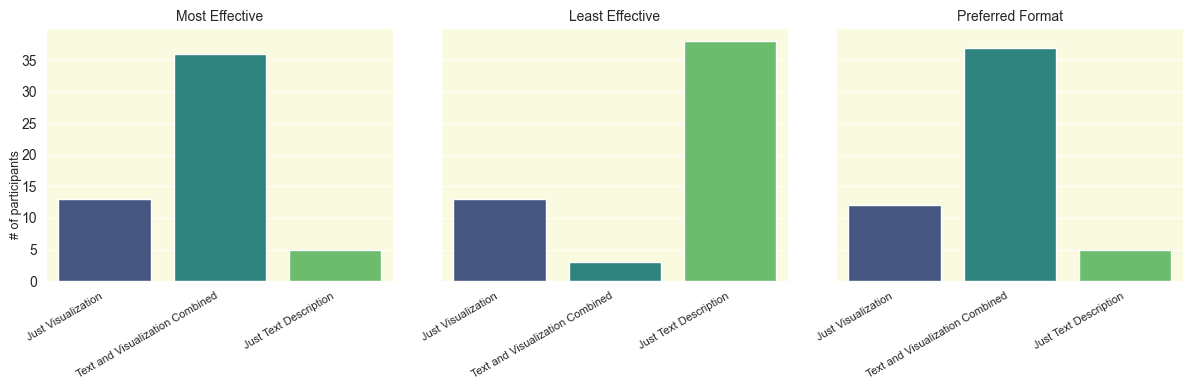

In [11]:
# Example DataFrame

conditions = ['Just Visualization', 'Text and Visualization Combined', 'Just Text Description']
# Initialize lists for counts
most_effective_list = [most_effective_counts.get(cond, 0) for cond in conditions]
least_effective_list = [least_effective_counts.get(cond, 0) for cond in conditions]
preferred_format_list = [preferred_format_counts.get(cond, 0) for cond in conditions]

# Print results to verify
print('Most Effective:', most_effective_list)
print('Least Effective:', least_effective_list)
print('Preferred Format:', preferred_format_list)

data = {
    'Condition': conditions,
    'Most Effective': most_effective_list,
    'Least Effective': least_effective_list,
    'Preferred Format': preferred_format_list
}
df = pd.DataFrame(data)

# Melt the DataFrame for easier plotting
df_melted = df.melt(id_vars='Condition', var_name='Category', value_name='Count')

# Seaborn settings
# sns.set_style("whitegrid")
sns.set_style("whitegrid", {'axes.facecolor': (0.98, 0.98, 0.88), 'grid.color': 'white'})

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharey=True, facecolor='white')

# Define titles
titles = ['Most Effective', 'Least Effective', 'Preferred Format']

# Plotting
palette = sns.color_palette("husl", len(conditions)) 
for ax, title in zip(axs, titles):
    sns.barplot(data=df_melted[df_melted['Category'] == title], x='Condition', y='Count', ax=ax, palette='viridis', ci=None)
    ax.set_title(title, fontsize=10)
    ax.set_xlabel('')
    # ax.set_ylabel('# of participants', fontsize=8)
    ax.set_ylabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right', fontsize=8)
    ax.set_facecolor((0.98, 0.98, 0.88))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)


# Set common y-label
fig.text(0.01, 0.5, '# of participants', va='center', rotation='vertical', fontsize=9)

# # Remove gridlines
# for ax in axs:
#     ax.grid(False)

fig.savefig('./figures/effectiveness-analysis.pdf', dpi=500, bbox_inches='tight')

plt.tight_layout()
plt.show()



In [12]:
# Load the main CSV file
file_path = './data/final-study.csv'
df = pd.read_csv(file_path)

# Define the columns to display
columns_of_interest = ['participantId','trialId', 'responseId', 'responsePrompt', 'answer', 'correctAnswer', 'dataset']
ans_df = df[columns_of_interest]

# Display the filtered dataframe
ans_df.head()


,participantId,trialId,responseId,responsePrompt,answer,correctAnswer,dataset
0,574dc90512d86b000f833ab0,Consent,id,Please enter your Prolific ID,574dc90512d86b000f833ab0,undefined,Undefined
1,574dc90512d86b000f833ab0,Consent,consent,Do you consent to the study and wish to continue?,yes,undefined,Undefined
2,574dc90512d86b000f833ab0,Training 1,1,What is the largest set?,Action,Action,Movie Genres
3,574dc90512d86b000f833ab0,Training 1,2,What is the largest intersection?,Empty Intersection (no sets),Empty Intersection (no sets),Movie Genres
4,574dc90512d86b000f833ab0,Training 1,3,How many sets make up the largest intersection?,It is the empty intersection (no sets),It is the empty intersection (no sets),Movie Genres


Percentage of Answering Correcty (based on Text, Both and Vis for each dataset (covid-text-Q1, covid-vis-Q1, etc. and training dataset)

In [13]:
# Load the data from prep-pilot.csv
file_path = './data/final-study.csv'
df = pd.read_csv(file_path)

# Define the trialIds of interest
trial_ids_of_interest = [
    'Training 1', 'Training 2', 'Training 3',
    'Covid-Vis-Q1', 'Covid-Text-Q1', 'Covid-Both-Q1',
    'Tennis-Vis-Q1', 'Tennis-Text-Q1', 'Tennis-Both-Q1',
    'Organizations-Vis-Q1', 'Organizations-Text-Q1', 'Organizations-Both-Q1'
]

# Filter the dataframe to include only rows with the specified trialIds
dataset_df = df[df['trialId'].isin(trial_ids_of_interest)]

print("Only the below trialIds have factual questions:")
print(dataset_df['trialId'].value_counts())
dataset_df.head(10)

# Convert 'isCorrectlyAnswered' from string to boolean
dataset_df['isCorrectlyAnswered'] = dataset_df['isCorrectlyAnswered'].apply(lambda x: True if x == 'True' else False if x == 'False' else x)

# Ensure isCorrectlyAnswered is boolean and filter out non-boolean values
filterCorrectAnswer_df = dataset_df[dataset_df['isCorrectlyAnswered'].isin([True, False])]
filterCorrectAnswer_df.head(10)

# print(filterCorrectAnswer_df['isCorrectlyAnswered'].value_counts())

# Calculate the percentage of correctly answered trials for each trialId
percentage_correct_by_trialid = filterCorrectAnswer_df.groupby('trialId')['isCorrectlyAnswered'].mean() * 100

# Display the results
print("Percentage of correctly answered trials for each trialId of having factual questions:")
print(percentage_correct_by_trialid)


Only the below trialIds have factual questions:
trialId
Covid-Vis-Q1             184
Training 1               162
Training 2               162
Training 3               162
Tennis-Both-Q1           160
Tennis-Text-Q1           160
Organizations-Both-Q1    160
Covid-Text-Q1            136
Organizations-Vis-Q1     136
Organizations-Text-Q1    136
Covid-Both-Q1            112
Tennis-Vis-Q1            112
Name: count, dtype: int64
Percentage of correctly answered trials for each trialId of having factual questions:
trialId
Covid-Both-Q1             91.964286
Covid-Text-Q1             84.558824
Covid-Vis-Q1              92.934783
Organizations-Both-Q1     80.625000
Organizations-Text-Q1     75.000000
Organizations-Vis-Q1      85.294118
Tennis-Both-Q1            82.500000
Tennis-Text-Q1            87.500000
Tennis-Vis-Q1             78.571429
Training 1               100.000000
Training 2                99.382716
Training 3               100.000000
Name: isCorrectlyAnswered, dtype: float64


/var/folders/t8/_mskc89n2_g3fy90ggktqfxm0000gn/T/ipykernel_71173/908383843.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df['isCorrectlyAnswered'] = dataset_df['isCorrectlyAnswered'].apply(lambda x: True if x == 'True' else False if x == 'False' else x)


Percentage of Answering Correcty (based on each Visual Contents - Vis, Text or Both)

In [14]:
# Create a new column to identify the visual content type (VIS, BOTH, Text)
def get_visual_content_type(trialId):
    if 'Vis' in trialId:
        return 'VIS'
    elif 'Both' in trialId:
        return 'BOTH'
    elif 'Text' in trialId:
        return 'TEXT'
    else:
        return 'TRAININGS'
    

filterCorrectAnswer_df['VisualContentType'] = filterCorrectAnswer_df['trialId'].apply(get_visual_content_type)

# Calculate the percentage of correctly answered trials for each Visual Content Type
percentage_correct_by_visual_content = filterCorrectAnswer_df.groupby('VisualContentType')['isCorrectlyAnswered'].mean() * 100

# Display the results
print("Percentage of correctly answered cumulatively for each Visual Content Type:")
print(percentage_correct_by_visual_content)

Percentage of correctly answered cumulatively for each Visual Content Type:
VisualContentType
BOTH         84.259259
TEXT         82.638889
TRAININGS    99.794239
VIS          86.805556
Name: isCorrectlyAnswered, dtype: float64


Percentage of Answering Correcty (based on datasets)

In [15]:

# Calculate the percentage of correctly answered trials for each dataset
percentage_correct_by_dataset = filterCorrectAnswer_df.groupby('dataset')['isCorrectlyAnswered'].mean() * 100

# Display the result
print("Percentage of correctly answered answer cumulatively for each dataset (of having factual questions only):")
print(percentage_correct_by_dataset)



Percentage of correctly answered answer cumulatively for each dataset (of having factual questions only):
dataset
Covid Symptoms                 90.046296
International Organizations    80.324074
Movie Genres                   99.794239
Tennis Grand Slam Winners      83.333333
Name: isCorrectlyAnswered, dtype: float64


Printing the answers of "What are the insights and takeaways about the data"?

In [16]:


# Load the data from prep-pilot.csv
file_path = './data/final-study.csv'
df = pd.read_csv(file_path)

# Define the Q3 trialIds of interest
q3_trial_ids = [
    'Covid-Vis-Q3', 'Covid-Text-Q3', 'Covid-Both-Q3',
    'Tennis-Vis-Q3', 'Tennis-Text-Q3', 'Tennis-Both-Q3',
    'Organizations-Vis-Q3', 'Organizations-Text-Q3', 'Organizations-Both-Q3'
]

# Filter the dataframe to include only rows with the specified Q3 trialIds
q3_df = df[df['trialId'].isin(q3_trial_ids)]

# Print the answers for all the Q3 trialIds
pd.set_option('display.max_colwidth', None)
(q3_df[['trialId','answer']])


,trialId,answer
22,Covid-Text-Q3,The set sizes have a lot of variation but the intersection properties seem very similar.
34,Organizations-Vis-Q3,There is a large divergence in the sets and the intersections.
46,Tennis-Both-Q3,Set sizes are mostly equal.
78,Covid-Both-Q3,It is a little repetitive.
90,Organizations-Vis-Q3,I think the set is about government organizations but I'm not sure.
...,...,...
2946,Organizations-Both-Q3,"With the accompanying text, the dataset was extremely easy to understand."
2958,Tennis-Text-Q3,"The all-set data is less obvious in a written format, as I expect it to be featured with the rest of the intersection data and not on its own."
2990,Organizations-Text-Q3,These stats represent well the info from all organisation
3002,Tennis-Both-Q3,explain well the stat


Completion time VS overall correctness

Only the below trialIds have factual questions:
trialId
Covid-Vis-Q1             184
Tennis-Both-Q1           160
Tennis-Text-Q1           160
Organizations-Both-Q1    160
Covid-Text-Q1            136
Organizations-Vis-Q1     136
Organizations-Text-Q1    136
Covid-Both-Q1            112
Tennis-Vis-Q1            112
Name: count, dtype: int64
participantId
574dc90512d86b000f833ab0     5.630767
5955a3eb98c9c400019f5c5f     4.494150
597fe89a1b41a20001749f57     4.611833
5aebc4ac75deca00016252ea    11.702000
5ba855d47c0ebe0001272f70     5.253867
5c6c260dce4e560001f75731     5.514500
5dd71896670d1a6af9f20eee     7.058683
5e02e5144acfb9e385bb4c5a     5.846250
5ece9e3b3a19db0cf5af6692    10.590333
5ed7b0c59a2ae024836e32d5     7.053917
5f4fc497a3b4320c8928639e     4.240483
60fcd02deba2c8e1ed1f0723     4.289000
61080d1c39e080da7841eade     2.953250
611116ac01f43eeeb3cdeff3     3.595117
628254ec789e78a3dcd22d99     4.763850
62bb4c95ca36f792585cb4b5     5.672183
63ea445c759d5bf0e3f63739     5.1020

/var/folders/t8/_mskc89n2_g3fy90ggktqfxm0000gn/T/ipykernel_71173/1178584967.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overall_df['isCorrectlyAnswered'] = overall_df['isCorrectlyAnswered'].apply(lambda x: True if x == 'True' else False if x == 'False' else x)


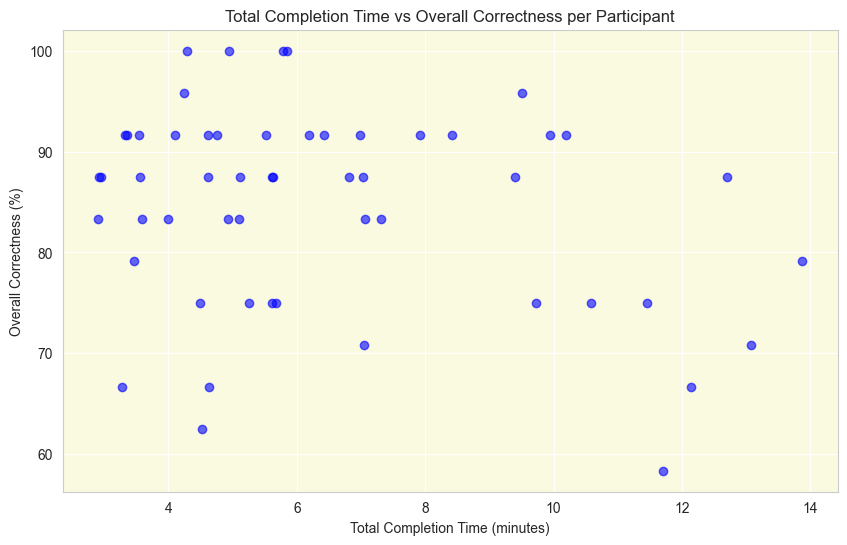

In [17]:
# Load the data from prep-pilot.csv
file_path = './data/final-study.csv'
df = pd.read_csv(file_path)

# Define the trialIds of interest
trial_ids_of_interest = [
    'Covid-Vis-Q1', 'Covid-Text-Q1', 'Covid-Both-Q1',
    'Tennis-Vis-Q1', 'Tennis-Text-Q1', 'Tennis-Both-Q1',
    'Organizations-Vis-Q1', 'Organizations-Text-Q1', 'Organizations-Both-Q1'
]

# Filter the dataframe to include only rows with the specified trialIds
overall_df = df[df['trialId'].isin(trial_ids_of_interest)]

print("Only the below trialIds have factual questions:")
print(overall_df['trialId'].value_counts())
overall_df.head(10)

# Convert 'isCorrectlyAnswered' from string to boolean
overall_df['isCorrectlyAnswered'] = overall_df['isCorrectlyAnswered'].apply(lambda x: True if x == 'True' else False if x == 'False' else x)

# Ensure isCorrectlyAnswered is boolean and filter out non-boolean values
overallCorrectAnswer_df = overall_df[overall_df['isCorrectlyAnswered'].isin([True, False])]
overallCorrectAnswer_df.head(10)

# Calculate correctness per participant per condition
overallCorrectAnswer_df['correctAnswerNumeric'] = overallCorrectAnswer_df['isCorrectlyAnswered'].astype(int)  # Convert correctness to numeric (1 for True, 0 for False)
correctness_by_participant = overallCorrectAnswer_df.groupby(['participantId', 'trialId'])['correctAnswerNumeric'].sum()

# Pivot the table to get a better structure for summing up correctness
correctness_pivot = correctness_by_participant.unstack().fillna(0)

# # Calculate the overall correctness per participant (sum the scores)
# correctness_pivot['overallCorrectness'] = correctness_pivot.sum(axis=1)
# Calculate the overall correctness percentage per participant (sum the scores and calculate percentage)
correctness_pivot['overallCorrectness'] = (correctness_pivot.sum(axis=1) / 24) * 100

# Select the first occurrence of each trialId per participant for duration calculation
first_occurrence_df = overallCorrectAnswer_df.groupby(['participantId', 'trialId']).first().reset_index()


# # Calculate the total completion time per participant
# total_time_by_participant = overallCorrectAnswer_df.groupby('participantId')['duration'].sum()/1000  # Convert milliseconds to seconds

# Calculate the total completion time per participant in minutes by summing the first durations
total_time_by_participant = first_occurrence_df.groupby('participantId')['duration'].sum() / 60000  # Convert milliseconds to minutes
print(total_time_by_participant)

# Combine correctness and duration into a single DataFrame
summary_df = pd.DataFrame({
    'totalCompletionTime': total_time_by_participant,
    'overallCorrectness': correctness_pivot['overallCorrectness']
})

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.scatter(summary_df['totalCompletionTime'], summary_df['overallCorrectness'], color='blue', alpha=0.6)
plt.title('Total Completion Time vs Overall Correctness per Participant')
# plt.xlabel('Total Completion Time (seconds)')
plt.xlabel('Total Completion Time (minutes)')
# plt.ylabel('Overall Correctness (out of 24)')
plt.ylabel('Overall Correctness (%)')
plt.grid(True)
plt.show()




(Ignore) Heatmap generation

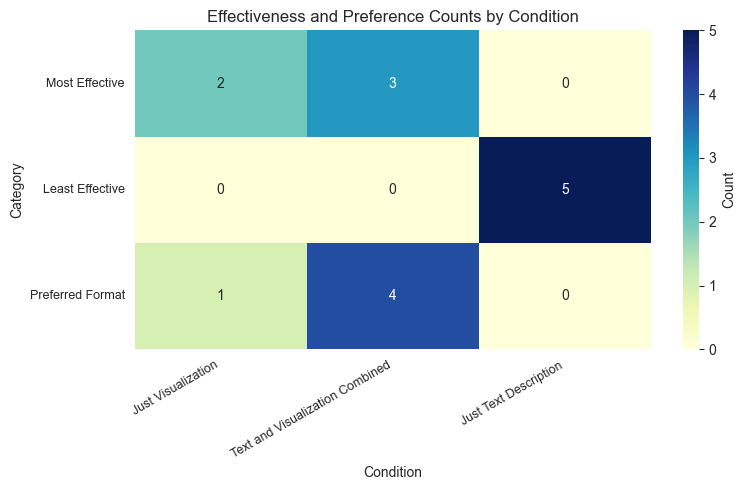

In [30]:
# Prepare data for heatmap
heatmap_data = df.set_index('Condition').T

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap='YlGnBu', cbar_kws={'label': 'Count'})

# Set titles and labels
plt.title('Effectiveness and Preference Counts by Condition', fontsize=12)
plt.xlabel('Condition', fontsize=10)
plt.ylabel('Category', fontsize=10)

plt.xticks(rotation=30, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)

plt.tight_layout()
plt.show()